## 登月图片消噪

scipy.fftpack模块用来计算快速傅里叶变换  
速度比传统傅里叶变换更快，是对之前算法的改进  
图片是二维数据，注意使用fftpack的二维转变方法

In [1]:
import scipy as sp
sp.__version__

'1.2.1'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

#快速傅里叶变换
import scipy.fftpack as fftpack

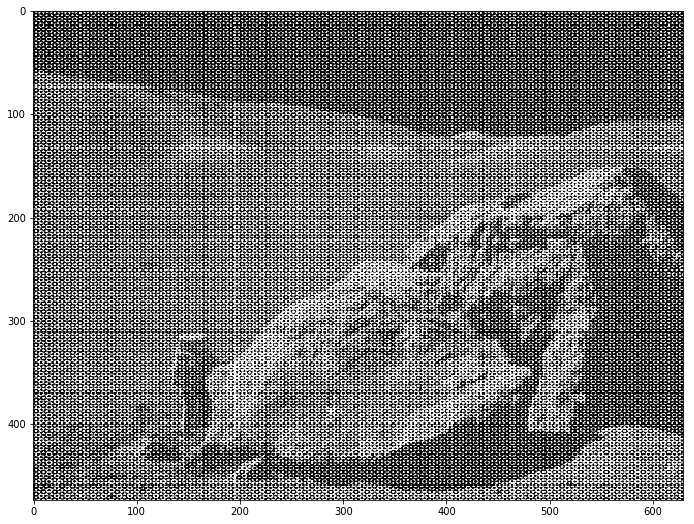

In [3]:
# ndarray  cmap= colormap
moon_data = plt.imread('moonlanding.png')
plt.figure(figsize=(12,9))
plt.imshow(moon_data,cmap='gray')

In [4]:
moon_data

array([[0.04705882, 0.        , 0.23921569, ..., 0.        , 0.00392157,
        0.53333336],
       [0.        , 0.        , 0.6784314 , ..., 0.10196079, 0.2901961 ,
        0.        ],
       [0.72156864, 0.10980392, 0.6039216 , ..., 0.        , 0.21568628,
        1.        ],
       ...,
       [0.00392157, 0.        , 1.        , ..., 1.        , 1.        ,
        0.95686275],
       [0.        , 0.        , 0.15686275, ..., 0.        , 0.        ,
        0.3529412 ],
       [1.        , 0.52156866, 0.04705882, ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

In [5]:
moon_data.shape

(474, 630)

In [6]:
#使用scipy中快速傅里叶变换进行二维的操作  fft是一维的数据 fft2是二维的
moon_data_fft = fftpack.fft2(moon_data)

In [7]:
moon_data_fft

array([[126598.45      +0.j       ,  -4608.5796 -1892.4688j   ,
          -322.093    -20.27744j  , ...,   -906.1585 +1539.3081j   ,
          -322.093    +20.27744j  ,  -4608.5796 +1892.4688j   ],
       [ -9421.1    +5242.1133j   ,   5224.016  -3171.7434j   ,
          1607.9927 +1269.4243j   , ...,   -677.34503 -936.16174j  ,
           354.6247 -1003.8348j   ,   1965.366  -2188.0593j   ],
       [ -2928.3513 +7280.916j    ,  -1116.4065 +1338.3179j   ,
          -474.20056 +385.40216j  , ...,    239.7723  -977.2129j   ,
          1582.9283  -261.95346j  ,   2641.927   -292.09366j  ],
       ...,
       [  1850.5718 -2451.1787j   ,   -781.0807   +13.744501j ,
           377.90707  +12.6699295j, ...,  -1526.7869 +1271.2621j   ,
         -2705.5718 -3488.529j    ,   1897.404  -2281.9092j   ],
       [ -2928.3513 -7280.916j    ,   2641.927   +292.09366j  ,
          1582.9283  +261.95346j  , ...,  -2208.4302   +81.807434j ,
          -474.20056 -385.40216j  ,  -1116.4065 -1338.3179j   ]

np.argmax/argmin:返回的是索引
    
np.where

In [9]:
# 根据条件进行滤波
# 如果数据大于3e3 则变成0
moon_data_fft_r = np.where(np.abs(moon_data_fft)>3e3,0,moon_data_fft)

In [10]:
#进行频率的过滤，突兀== 高频
#过滤高频

condition = np.abs(moon_data_fft) > 8e2


#查找满足这一条件的索引

# index = np.argwhere(condition)

#
moon_data_fft[condition] = 0
# condition


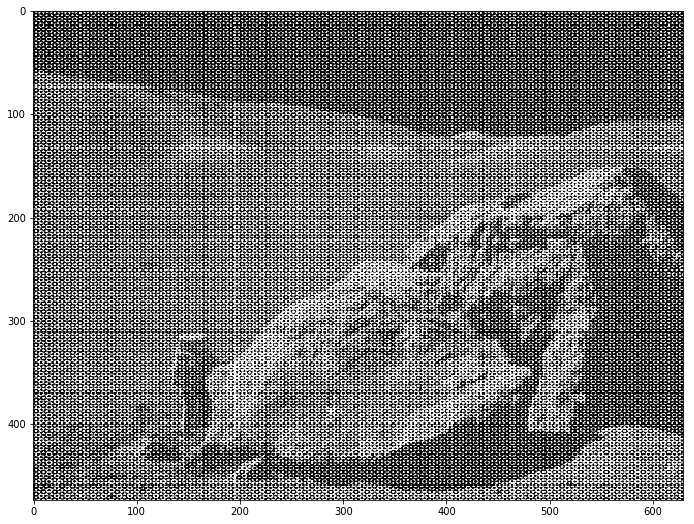

In [11]:
plt.figure(figsize=(12,9))
plt.imshow(moon_data,cmap = 'gray')

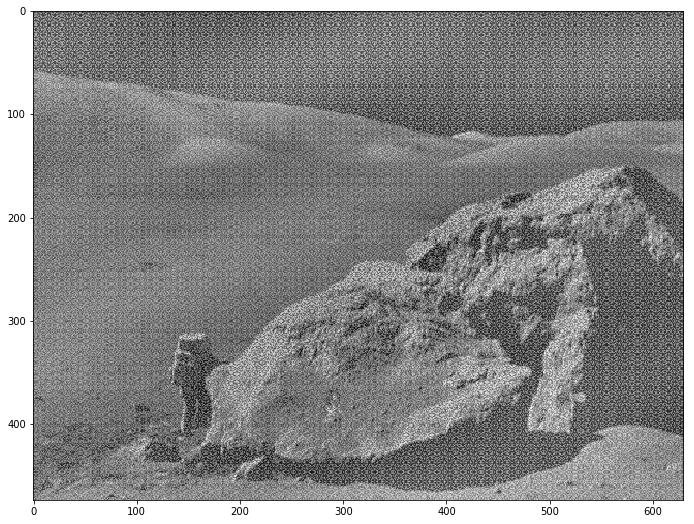

In [12]:
moon_data_ifft = fftpack.ifft2(moon_data_fft_r)

result = np.real(moon_data_ifft)


#显示
plt.figure(figsize=(12,9))
plt.imshow(result,cmap = 'gray')


In [13]:
moon_data_ifft = fftpack.ifft2(moon_data_fft)

In [14]:
moon_data_result = np.real(moon_data_ifft)

In [15]:
moon_data_result.shape

(474, 630)

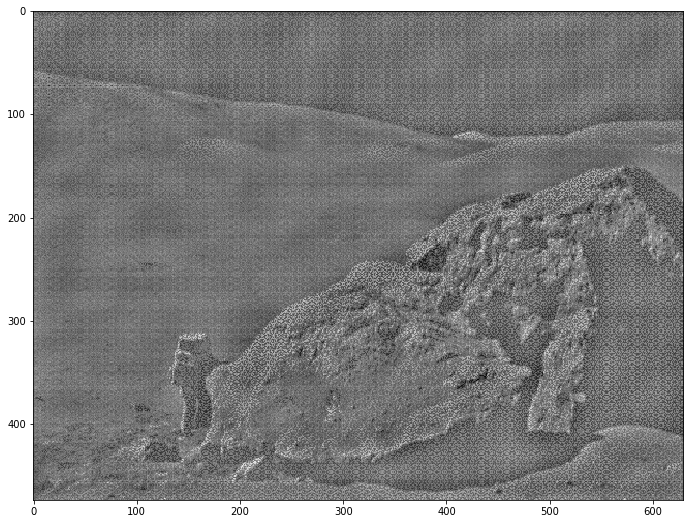

In [16]:
# 8e2
plt.figure(figsize=(12,9))
plt.imshow(moon_data_result,cmap='gray')

### 数值积分，求解圆周率
求解圆周率  

integrate
对函数(1 - x^2)^0.5进行积分 

X**2 + Y**2 = 1,半径是1  
pi×r**2,只要求得面积--->pi

首先画一个圆

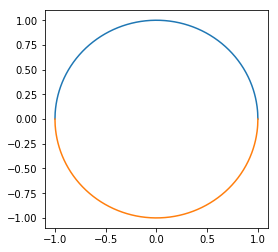

In [55]:
#x**2 + y**2 = 4

# y**2 = 1 - x**2
# f(x) = (1 - x**2)**0.5


f = lambda x : (1 - x**2)**0.5
x = np.linspace(-1,1,1000)
plt.figure(figsize=(4,4))
plt.plot(x,f(x))
plt.plot(x,-f(x))

圆的面积是？

In [ ]:
pi*r**2

r = 1

现在此圆的面积就是：pi

使用scipy.integrate进行积分，调用quad()方法

In [1]:
import scipy.integrate as integrate

In [60]:
#结果，误差
#f 不需要f(x)
pi_2,err = integrate.quad(f,-1,1)

In [61]:
pi = pi_2*2
pi

3.1415926535897967

### Scipy文件输入/输出


随机生成数组，使用scipy中的io.savemat()保存  
文件格式是.mat，标准的二进制文件

In [2]:
import scipy.io as spio

In [4]:
nd = np.random.randint(0,150, size=10)

In [5]:
spio.savemat('nd.mat',{'data': nd})

使用io.loadmat()读取数据

In [8]:
spio.loadmat('nd.mat')

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Apr 25 01:25:30 2019',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[  4,  52,  90, 104,  82,   0,  87,  69, 124,  74]])}

In [9]:
spio.loadmat('nd.mat')['data']

array([[  4,  52,  90, 104,  82,   0,  87,  69, 124,  74]])

读写图片使用scipy中misc.imread()/imsave()

In [5]:
import scipy.misc as misc

In [21]:
cat_data = misc.imread('cat.jpg')

/Users/rottengeek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [22]:
import imageio
cat_data = imageio.imread('cat.jpg')

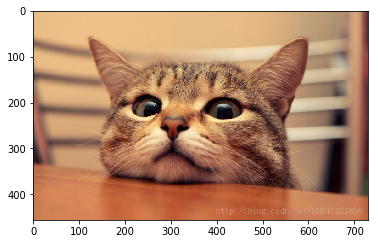

In [24]:
plt.imshow(cat_data)

misc旋转、resize、imfilter

/Users/rottengeek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imrotate` is deprecated!
`imrotate` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.rotate`` instead.
  """Entry point for launching an IPython kernel.


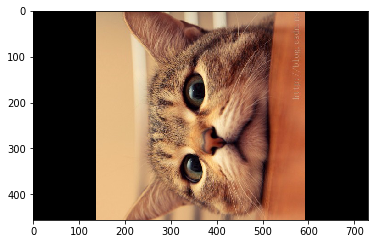

In [30]:
cat_angle = misc.imrotate(cat_data,angle=90)
plt.imshow(cat_angle)

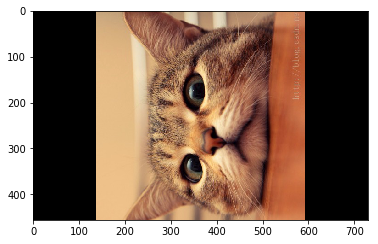

In [32]:
import skimage
cat_angle = skimage.transform.rotate(cat_data, angle=90)
plt.imshow(cat_angle)

/Users/rottengeek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.


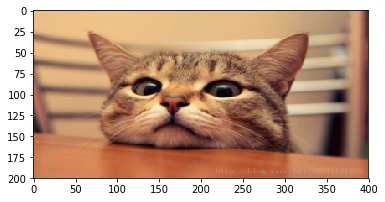

In [35]:
data = misc.imresize(cat_data,(200,400))

# misc.imsave('cat2.jpg',data)
#Size of the output image
plt.imshow(data)

/Users/rottengeek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imfilter` is deprecated!
`imfilter` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow filtering functionality directly.
  This is separate from the ipykernel package so we can avoid doing imports until


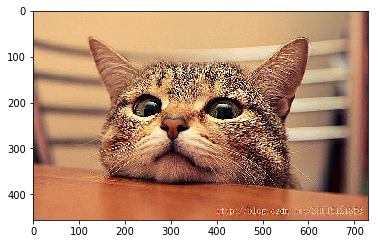

In [36]:
#     'blur', 'contour', 'detail', 'edge_enhance', 'edge_enhance_more',
#     'emboss', 'find_edges', 'smooth', 'smooth_more', 'sharpen'
plt.imshow(misc.imfilter(cat_data,ftype='edge_enhance'))

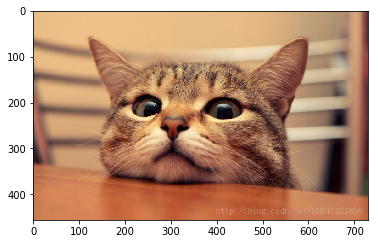

In [37]:
plt.imshow(cat_data)

### 图片处理

使用scipy.misc.face(gray=True)获取图片，使用ndimage移动坐标、旋转图片、切割图片、缩放图片

导包，读取图片显示图片

In [3]:
import scipy.ndimage as ndimage

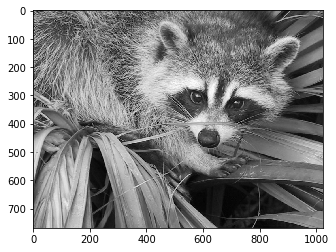

In [7]:
face = misc.face(gray=True)

plt.imshow(face, cmap='gray')

shift移动坐标

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

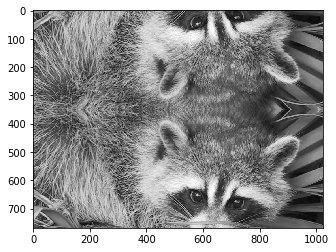

In [12]:
# mode: {'constant', 'nearest', 'reflect', 'mirror' or 'wrap'}

#sequence argument must have length equal to input rank
# 第一个参数是上下移动 第二个左右
face_shift = ndimage.shift(face,(350,0),mode='mirror')
plt.imshow(face_shift,cmap = 'gray')

rotate旋转图片

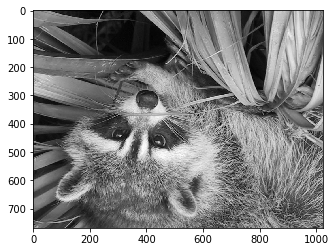

In [18]:
face_rotate = ndimage.rotate(face,angle=180)

plt.imshow(face_rotate,cmap = 'gray')

zoom缩放图片

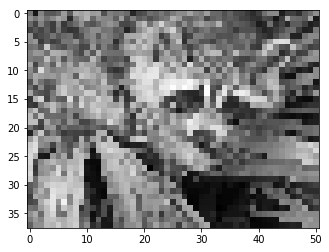

In [21]:
face_zoom = ndimage.zoom(face,zoom = 0.05)


plt.imshow(face_zoom,cmap = 'gray')

切割图片

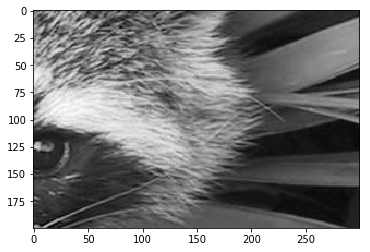

In [35]:
#数组的切片
face_mini = face[200:400,200:500]

plt.imshow(face_mini,cmap = 'gray')

如果图片是三维的 ndimage.shift(face, [350,0,0], mode='mirror') 必须第三维度颜色不进行移动 参数要和维度一致
  ndimage.zoom(face, zoom=(0.1,0.1,1)) 第三维度颜色不变

图片进行过滤   
添加噪声，对噪声图片使用ndimage中的高斯滤波、中值滤波、signal中维纳滤波进行处理  
使图片变清楚

加载图片，使用灰色图片misc.face()添加噪声

In [36]:
face = misc.face(gray=True)

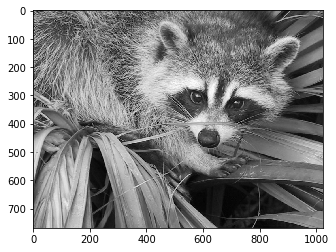

In [37]:
plt.imshow(face,cmap = 'gray')

In [38]:
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [39]:
face.shape

(768, 1024)

In [40]:
face.std()

54.721679908790065

In [41]:
face.dtype

dtype('uint8')

In [50]:
np.random.rand(768,1024).dtype

dtype('float64')

In [48]:
noisy_face = face.copy().astype(float)

In [53]:
#为清晰的图片的添加噪声，变模糊
noisy_face += face.std()*0.5*np.random.standard_normal(face.shape)

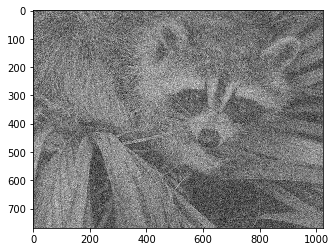

In [54]:
plt.imshow(noisy_face, cmap='gray')

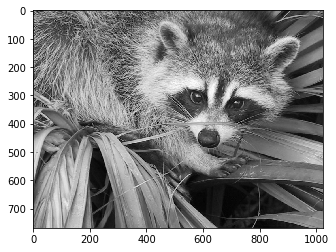

In [55]:
plt.imshow(face,cmap = 'gray')

高斯滤波sigma：高斯核的标准偏差

In [56]:
face_gaussian = ndimage.gaussian_filter(noisy_face,sigma=1)

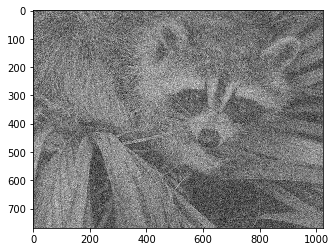

In [57]:
plt.imshow(noisy_face,cmap = 'gray')

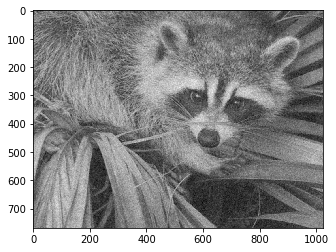

In [58]:
plt.imshow(face_gaussian,cmap = 'gray')

中值滤波参数size：给出在每个元素上从输入数组中取出的形状位置，定义过滤器功能的输入
非线性平滑技术

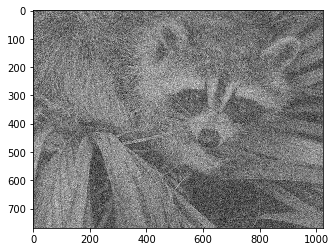

In [59]:
plt.imshow(noisy_face,cmap = 'gray')

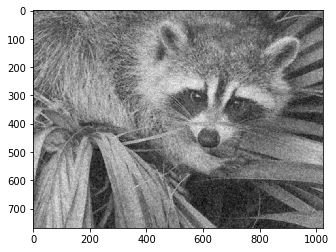

In [60]:
face_median = ndimage.median_filter(noisy_face,size = 5)

plt.imshow(face_median,cmap = 'gray')

signal维纳滤波mysize：滤镜尺寸的标量

In [61]:
import scipy.signal as signal

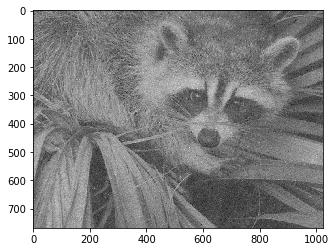

In [62]:
face_wiener = signal.wiener(noisy_face,mysize=3)
plt.imshow(face_wiener,cmap = 'gray')

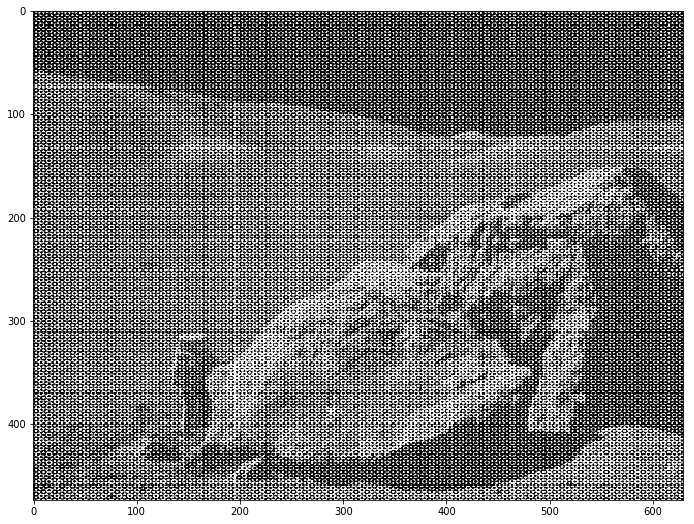

In [63]:
moon = plt.imread('moonlanding.png')

plt.figure(figsize=(12,9))
plt.imshow(moon,cmap = 'gray')

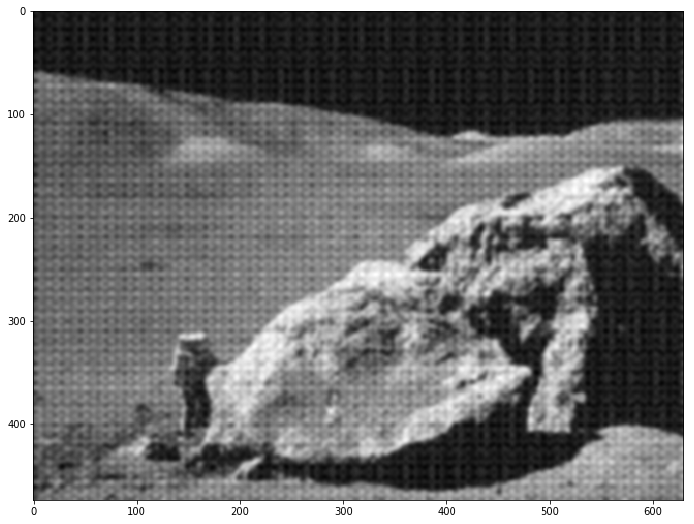

In [67]:
moon_gaussian = ndimage.gaussian_filter(moon,sigma=2)

plt.figure(figsize=(12,9))
plt.imshow(moon_gaussian,cmap = 'gray')

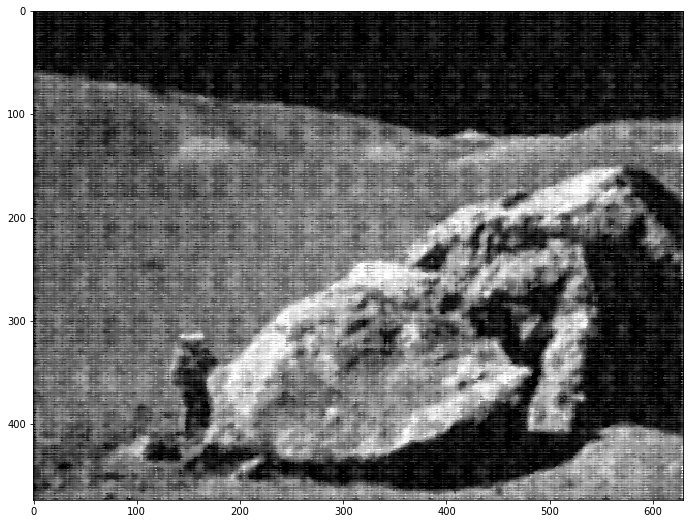

In [70]:
moon_median = ndimage.median_filter(moon,size=7)

plt.figure(figsize=(12,9))
plt.imshow(moon_median,cmap = 'gray')